<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/BuySell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
#Importing needed libraries

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [174]:
stock_price_df = pd.read_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv')
#print(stock_price_df['AMZN'].head())
#print(stock_price_df['AMZN'].tail())


df = pd.DataFrame()
df['AMZN'] = stock_price_df['AMZN'].values
df = df.dropna()
df

,AMZN
0,753.669983
1,757.179993
2,780.450012
3,795.989990
4,796.919983
...,...
1071,3279.389893
1072,3299.300049
1073,3372.199951
1074,3379.389893


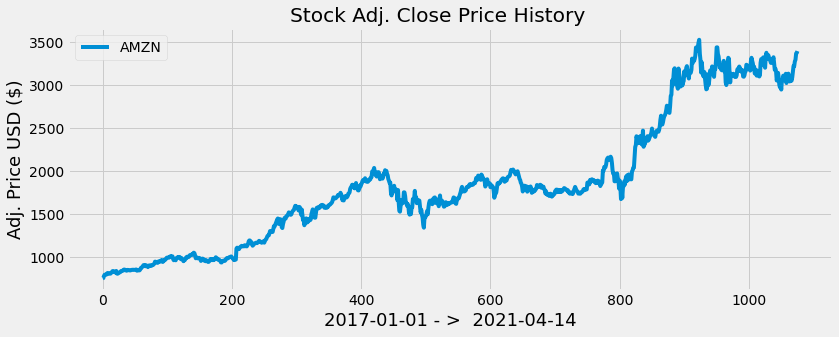

In [175]:
# Visually Show The Stock/Portfolio Price(s)
# Create the title 
title = 'Stock Adj. Close Price History    '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
plt.title(title)
plt.xlabel('2017-01-01 - >  2021-04-14',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [176]:
#Create the 30 day simple moving average
SMA30 = df.rolling(window=30).mean()
SMA30

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3092.361003
1072,3097.020003
1073,3107.521338
1074,3117.070003


In [177]:
#Create the 100 day simple moving average
SMA100 = df.rolling(window=100).mean()
SMA100

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3173.561089
1072,3175.180190
1073,3177.799390
1074,3180.305188


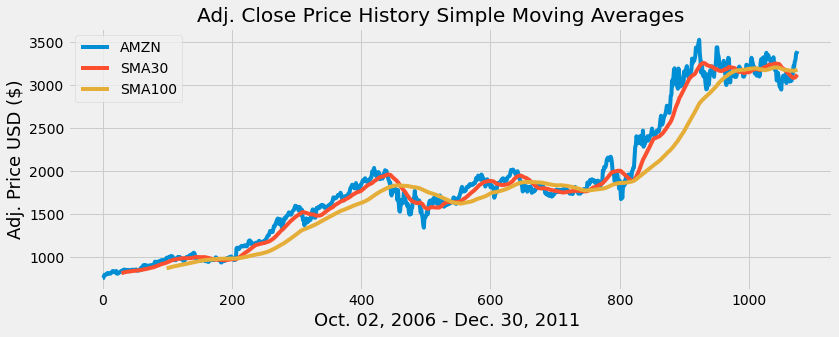

In [178]:
# Visually Show The Stock and The Moving Averages
# Create the title 
title = 'Adj. Close Price History Simple Moving Averages   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['AMZN'],  label='AMZN')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( SMA30['AMZN'],  label='SMA30')
plt.plot( SMA100['AMZN'],  label='SMA100')
  
plt.title(title)
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011 ',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [179]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if sma30 > sma100  then buy else sell
      if signal['SMA30'][i] > signal['SMA100'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['AMZN'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['SMA30'][i] < signal['SMA100'][i]:
        if flag != 0:
          sigPriceSell.append(signal['AMZN'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('sell')
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [180]:
#Create a new dataframe
signal = pd.DataFrame(index=df['AMZN'].index)
signal['AMZN'] = df['AMZN']
signal['SMA30'] = SMA30['AMZN']
signal['SMA100'] = SMA100['AMZN']

In [181]:
signal

,AMZN,SMA30,SMA100
0,753.669983,NaN,NaN
1,757.179993,NaN,NaN
2,780.450012,NaN,NaN
3,795.989990,NaN,NaN
4,796.919983,NaN,NaN
...,...,...,...
1071,3279.389893,3092.361003,3173.561089
1072,3299.300049,3097.020003,3175.180190
1073,3372.199951,3107.521338,3177.799390
1074,3379.389893,3117.070003,3180.305188


In [182]:
x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]

In [183]:
signal


,AMZN,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,753.669983,NaN,NaN,NaN,NaN
1,757.179993,NaN,NaN,NaN,NaN
2,780.450012,NaN,NaN,NaN,NaN
3,795.989990,NaN,NaN,NaN,NaN
4,796.919983,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1071,3279.389893,3092.361003,3173.561089,NaN,NaN
1072,3299.300049,3097.020003,3175.180190,NaN,NaN
1073,3372.199951,3107.521338,3177.799390,NaN,NaN
1074,3379.389893,3117.070003,3180.305188,NaN,NaN


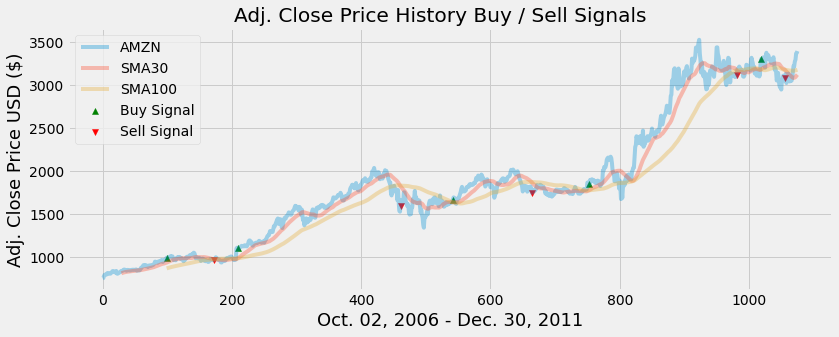

In [184]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Adj. Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = signal
ticker = 'AMZN'
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( my_stocks['SMA30'],  label='SMA30', alpha = 0.35)
plt.plot( my_stocks['SMA100'],  label='SMA100', alpha = 0.35)
plt.title(title)
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011',fontsize=18)
plt.ylabel('Adj. Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [185]:
def buy_and_sell(stock_price):
    max_profit_val, current_max_val = 0, 0 
    for price in reversed(stock_price):                       
        current_max_val = max(current_max_val, price)          
        potential_profit = current_max_val - price          
        max_profit_val = max(potential_profit, max_profit_val)

    return max_profit_val


AMZN = list(df["AMZN"])

last30 = AMZN[-30:]
print(buy_and_sell(last30))

448.050048828125


In [186]:
last30

[3094.530029296875,
 3005.0,
 2977.570068359375,
 3000.4599609375,
 2951.949951171875,
 3062.85009765625,
 3057.639892578125,
 3113.590087890625,
 3089.489990234375,
 3081.679931640625,
 3091.860107421875,
 3135.72998046875,
 3027.989990234375,
 3074.9599609375,
 3110.8701171875,
 3137.5,
 3087.070068359375,
 3046.260009765625,
 3052.030029296875,
 3075.72998046875,
 3055.2900390625,
 3094.080078125,
 3161.0,
 3226.72998046875,
 3223.820068359375,
 3279.389892578125,
 3299.300048828125,
 3372.199951171875,
 3379.389892578125,
 3400.0]

MFI 
Money Flow Index (MFI)


In [187]:
!pip install yfinance
!pip install yahoofinancials

In [233]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
company = 'DIS'
startDate = "2021-02-20"

endDate = "2021-04-21"
dataframe = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)

dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,181.740005,194.020004,181.529999,191.759995,191.759995,18799600
2021-02-23,193.589996,198.940002,188.660004,197.089996,197.089996,23191400
2021-02-24,197.580002,200.600006,195.330002,197.509995,197.509995,16205900
2021-02-25,197.729996,197.960007,190.380005,190.979996,190.979996,12712000
2021-02-26,190.070007,191.610001,185.449997,189.039993,189.039993,15841000
2021-03-01,193.229996,196.899994,191.389999,194.979996,194.979996,10699500
2021-03-02,196.100006,197.960007,193.490005,193.940002,193.940002,8362600
2021-03-03,194.630005,196.809998,192.210007,192.259995,192.259995,8737600
2021-03-04,189.899994,192.479996,184.119995,188.029999,188.029999,12523700


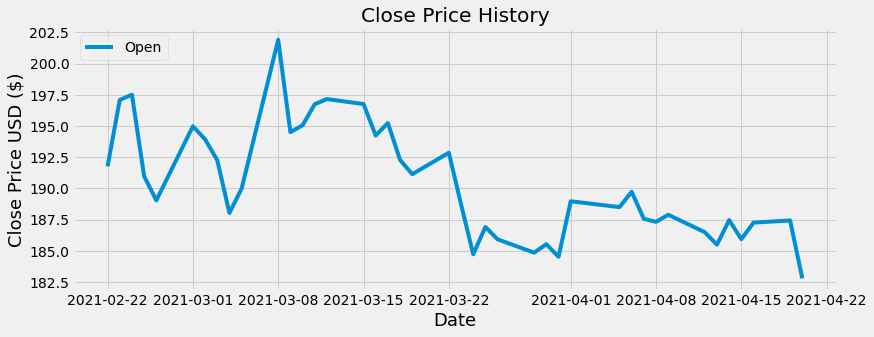

In [234]:
#Visually Show The Stock Price
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( dataframe['Close'],  label='Close Price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)  
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(dataframe.columns.values, loc='upper left')
plt.show()

In [235]:
#Calculate the typical price
typical_price = (dataframe['Close'] + dataframe['High'] + dataframe['Low']) / 3
typical_price

Date
2021-02-22    189.103333
2021-02-23    194.896667
2021-02-24    197.813334
2021-02-25    193.106669
2021-02-26    188.699997
2021-03-01    194.423330
2021-03-02    195.130005
2021-03-03    193.760000
2021-03-04    188.209997
2021-03-05    187.966670
2021-03-08    199.573334
2021-03-09    196.859996
2021-03-10    196.179998
2021-03-11    197.066666
2021-03-12    196.916667
2021-03-15    196.703328
2021-03-16    194.570002
2021-03-17    194.403336
2021-03-18    193.033335
2021-03-19    191.633331
2021-03-22    193.730001
2021-03-23    189.679998
2021-03-24    186.620000
2021-03-25    185.210002
2021-03-26    185.823334
2021-03-29    184.646667
2021-03-30    185.136668
2021-03-31    185.279999
2021-04-01    187.886668
2021-04-05    189.419998
2021-04-06    189.626663
2021-04-07    188.279999
2021-04-08    187.000005
2021-04-09    187.419998
2021-04-12    186.606669
2021-04-13    185.510005
2021-04-14    187.856669
2021-04-15    186.843328
2021-04-16    187.643331
2021-04-19    187.80

In [236]:
period =  14 #The typical period used for MFI is 14 days


In [237]:
#Calculate the money flow
money_flow = typical_price * dataframe['Volume']
money_flow

Date
2021-02-22    3.555067e+09
2021-02-23    4.519927e+09
2021-02-24    3.205743e+09
2021-02-25    2.454772e+09
2021-02-26    2.989197e+09
2021-03-01    2.080232e+09
2021-03-02    1.631794e+09
2021-03-03    1.692997e+09
2021-03-04    2.357086e+09
2021-03-05    1.911226e+09
2021-03-08    5.003164e+09
2021-03-09    4.578845e+09
2021-03-10    2.677680e+09
2021-03-11    2.349113e+09
2021-03-12    2.607551e+09
2021-03-15    2.028287e+09
2021-03-16    1.868281e+09
2021-03-17    2.792332e+09
2021-03-18    1.859702e+09
2021-03-19    5.033326e+09
2021-03-22    1.712283e+09
2021-03-23    2.029804e+09
2021-03-24    2.528533e+09
2021-03-25    1.779720e+09
2021-03-26    1.891143e+09
2021-03-29    1.393104e+09
2021-03-30    1.097805e+09
2021-03-31    1.570804e+09
2021-04-01    1.453454e+09
2021-04-05    1.402712e+09
2021-04-06    1.503019e+09
2021-04-07    1.174622e+09
2021-04-08    1.451681e+09
2021-04-09    1.140095e+09
2021-04-12    1.243267e+09
2021-04-13    1.266384e+09
2021-04-14    1.707598e

In [238]:
#Get all of the positive and negative money flows 
#where the current typical price is higher than the previous day's typical price, we will append that days money flow to a positive list
#and where the current typical price is lower than the previous day's typical price, we will append that days money flow to a negative list
#and set any other value to 0 to be used when summing
positive_flow =[] #Create a empty list called positive flow
negative_flow = [] #Create a empty list called negative flow
#Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]: #if the present typical price is greater than yesterdays typical price
    positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
    negative_flow.append(0) #Append 0 to the negative flow list
  elif typical_price[i] < typical_price[i-1]:#if the present typical price is less than yesterdays typical price
    negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
    positive_flow.append(0)#Append 0 to the positive flow list
  else: #Append 0 if the present typical price is equal to yesterdays typical price
    positive_flow.append(0)
    negative_flow.append(0)


In [239]:
#Get all of the positive and negative money flows within the time period
positive_mf =[]
negative_mf = [] 
#Get all of the positive money flows within the time period
for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))
#Get all of the negative money flows within the time period  
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

In [240]:
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))
mfi

array([43.24480393, 35.39316077, 25.70915663, 26.65822698, 26.41214303,
       18.81902005, 25.063521  , 25.01108468, 24.7940227 , 24.68497037,
       24.43002168, 26.55744132, 33.43638502, 30.0408768 , 36.01787291,
       42.45460364, 48.32620172, 48.95554705, 51.95198124, 58.34524739,
       45.86461835, 46.85776066, 54.62996013, 56.86391886, 55.93596942,
       65.35062454, 58.10634522])

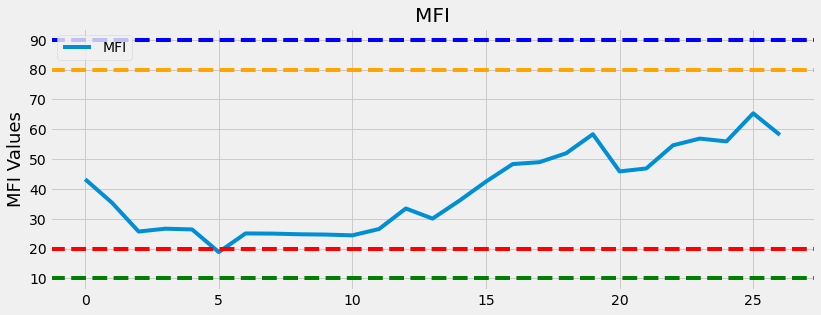

In [241]:
# Visually Show The Money Flow Index
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df2['MFI'],  label='MFI')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.axhline(10, linestyle='--', color = 'green')  #Over Sold line (Buy)
plt.axhline(20, linestyle='--',color = 'red')  #Over Sold Line (Buy)
plt.axhline(80, linestyle='--', color = 'orange')  #Over Bought line (Sell)
plt.axhline(90, linestyle='--', color = 'blue')  #Over Bought line (Sell)
plt.title('MFI')
plt.ylabel('MFI Values',fontsize=18)
plt.legend(df2.columns.values, loc='upper left')
plt.show()

In [242]:
""

''

In [243]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01
mean,190.932195,193.033416,188.171950,190.426585,190.426585,1.146327e+07
std,4.844974,4.797636,4.423710,4.524639,4.524639,5.232577e+06
min,181.740005,185.940002,181.009995,182.789993,182.789993,5.929700e+06
25%,187.509995,188.979996,184.639999,187.259995,187.259995,7.763000e+06
50%,190.059998,191.669998,186.949997,189.039993,189.039993,9.634100e+06
75%,194.949997,196.899994,192.000000,194.240005,194.240005,1.324190e+07
max,200.190002,203.020004,195.399994,201.910004,201.910004,2.626540e+07


In [244]:
buySellQuick = ['DIS',"AMZN",'TSLA',"DXCM",'SNAP','NFLX']


In [263]:
finalData=pd.DataFrame()
startDate = "2021-01-21"

endDate = "2021-04-21"
for company in buySellQuick:
  tsla_df = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Volume',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Close': company})
  tmp = tsla_df[str(company)]

  finalData = finalData.append(tmp, ignore_index=True)
finalData
finalData = finalData.T # or df2.transpose()
for i in range(len(buySellQuick)):
  finalData = finalData.rename(columns={i: buySellQuick[i]})





In [264]:
finalData.describe()

,DIS,AMZN,TSLA,DXCM,SNAP,NFLX
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,186.575645,3203.864183,731.148546,378.869842,59.155484,537.626937
std,8.137315,126.587183,84.011306,22.036201,5.097759,18.959508
min,163.029999,2951.949951,563.000000,339.149994,48.950001,493.329987
25%,184.570004,3090.082520,670.242493,360.220009,54.635001,522.009979
50%,187.614998,3225.275024,704.959991,375.620010,59.820000,540.444977
75%,191.604996,3311.557495,803.152512,399.025002,62.855000,551.954987
max,201.910004,3400.000000,883.090027,418.940002,70.449997,579.840027


In [265]:
finalData.iloc[-1]

DIS      182.789993
AMZN    3334.689941
TSLA     718.989990
DXCM     388.910004
SNAP      58.490002
NFLX     549.570007
Name: 2021-04-20 00:00:00, dtype: float64

In [266]:
for i in finalData:
  print("****" + i + "*****")
  print(str (finalData[i].iloc[-1]) + " last close")
  print(str(finalData[i].mean()) +  " mean")
  senal = (finalData[i].iloc[-1]) - int(finalData[i].mean() )
  print(senal)

****DIS*****
182.7899932861328 last close
186.57564495455833 mean
-3.2100067138671875
****AMZN*****
3334.68994140625 last close
3203.8641829952116 mean
131.68994140625
****TSLA*****
718.989990234375 last close
731.1485457881804 mean
-12.010009765625
****DXCM*****
388.9100036621094 last close
378.8698420370779 mean
10.910003662109375
****SNAP*****
58.4900016784668 last close
59.15548373806861 mean
-0.5099983215332031
****NFLX*****
549.5700073242188 last close
537.626937373992 mean
12.57000732421875
